# Importing libraries

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# Import the warnings module
import warnings

# Ignore future warnings with the specified action
warnings.simplefilter(action="ignore", category=UserWarning)

# Importing Dataset

In [96]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [97]:
df.shape

(10000, 3)

In [98]:
# Descriptive statistics for the 'Height' column in the original DataFrame 'df'
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

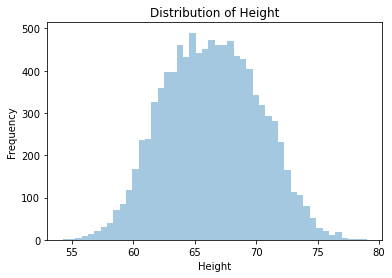

In [99]:
# Plot the distribution of the original 'Height' column
sns.distplot(df['Height'], kde=False)  

# Add labels and a title to the plot
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Height')

# Show the plot
plt.show()

<AxesSubplot:>

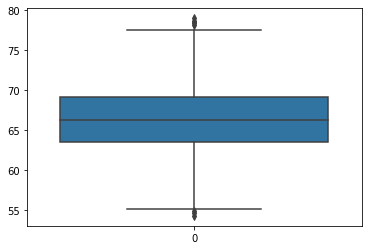

In [100]:
# Boxplot of original Height column
sns.boxplot(df['Height'])

# Trimming

In [101]:
# Calculate the 99th percentile value (upper limit) of the 'Height' column
upper_limit = df['Height'].quantile(0.99)

# Display the calculated upper limit
upper_limit

74.7857900583366

In [102]:
# Calculate the 1st percentile value (lower limit) of the 'Height' column
lower_limit = df['Height'].quantile(0.01)

# Display the calculated lower limit
lower_limit

58.13441158671655

In [103]:
# Create a new DataFrame 'new_df' by filtering rows where 'Height' is between 58.13 and 74.78
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [104]:
# Descriptive statistics for the 'Height' column in the DataFrame 'new_df' after trimming
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

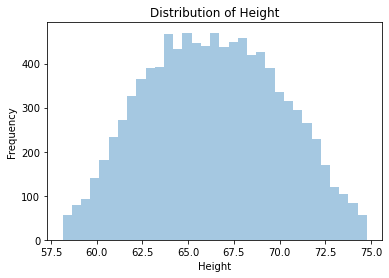

In [105]:
# Plot the distribution of the 'Height' column after trimming outliers
sns.distplot(new_df['Height'], kde=False)  

# Add labels and a title to the plot
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Height')

# Show the plot
plt.show()

<AxesSubplot:>

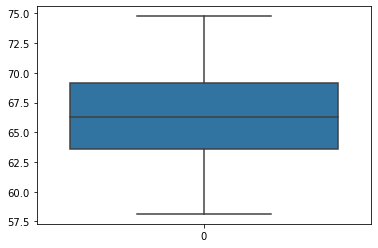

In [106]:
# Boxplot of Height column after trimming outliers
sns.boxplot(new_df['Height'])

# Capping ==> Winsorization

In [107]:
# Update the 'Height' column using numpy's 'np.where' function
# Replace values greater than or equal to 'upper_limit' with 'upper_limit'
# Replace values less than or equal to 'lower_limit' with 'lower_limit'
# Keep values between 'lower_limit' and 'upper_limit' unchanged
df['Height'] = np.where(df['Height'] >= upper_limit,
                        upper_limit,
                        np.where(df['Height'] <= lower_limit,
                                 lower_limit,
                                 df['Height']))

In [108]:
df.shape

(10000, 3)

In [109]:
# Descriptive statistics for the 'Height' column in the DataFrame 'df' after capping
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

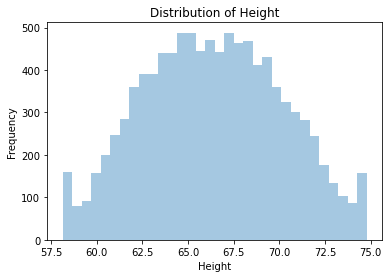

In [110]:
# Plot the distribution of the 'Height' column after capping outliers
sns.distplot(df['Height'], kde=False)  

# Add labels and a title to the plot
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Height')

# Show the plot
plt.show()

<AxesSubplot:>

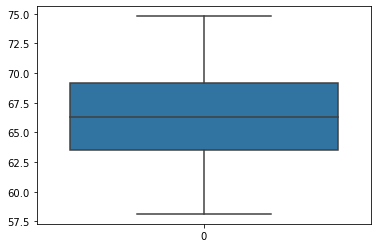

In [111]:
# Boxplot of Height column after capping outliers
sns.boxplot(df['Height'])